# IMDB dataset example

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

In [2]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
# vectorize the inputs
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indecies of results[i] to 1s
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [7]:
# vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
# building the model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='mean_square_error', metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [10]:
# validating set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 347us/step - loss: 0.4977 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.2958 - acc: 0.9043 - val_loss: 0.2989 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 4s 259us/step - loss: 0.2160 - acc: 0.9288 - val_loss: 0.3087 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.1741 - acc: 0.9433 - val_loss: 0.2831 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.1414 - acc: 0.9542 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3092 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 4s 269us/step - 

In [12]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [13]:
# plot the training and validtion losses
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)
# 'bo' for blue dot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# 'b' for solid blue line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

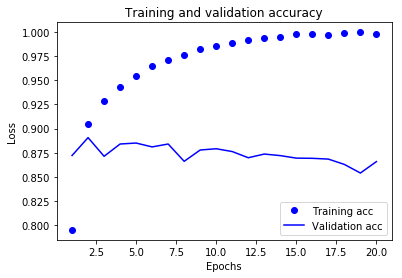

In [14]:
# plot the training and validtion accuracy
# clear the figure
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# new model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 5s 193us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 5s 182us/step - loss: 0.2658 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 4s 175us/step - loss: 0.1983 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 5s 181us/step - loss: 0.1678 - acc: 0.9402 2s - l


In [16]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 5s 214us/step
[0.3234890302276611, 0.87336]


In [17]:
model.predict(x_test)

array([[0.13963136],
       [0.99970216],
       [0.2971085 ],
       ...,
       [0.07184994],
       [0.04326665],
       [0.4733382 ]], dtype=float32)